LAB 2

In [129]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [130]:
# Data Loading

waterquality = pd.read_excel('waterquality.xlsx')

print ("Clean Size waterquality", waterquality.shape)

print("Type", type(waterquality))

waterquality.head()

Clean Size waterquality (7996, 21)
Type <class 'pandas.core.frame.DataFrame'>


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


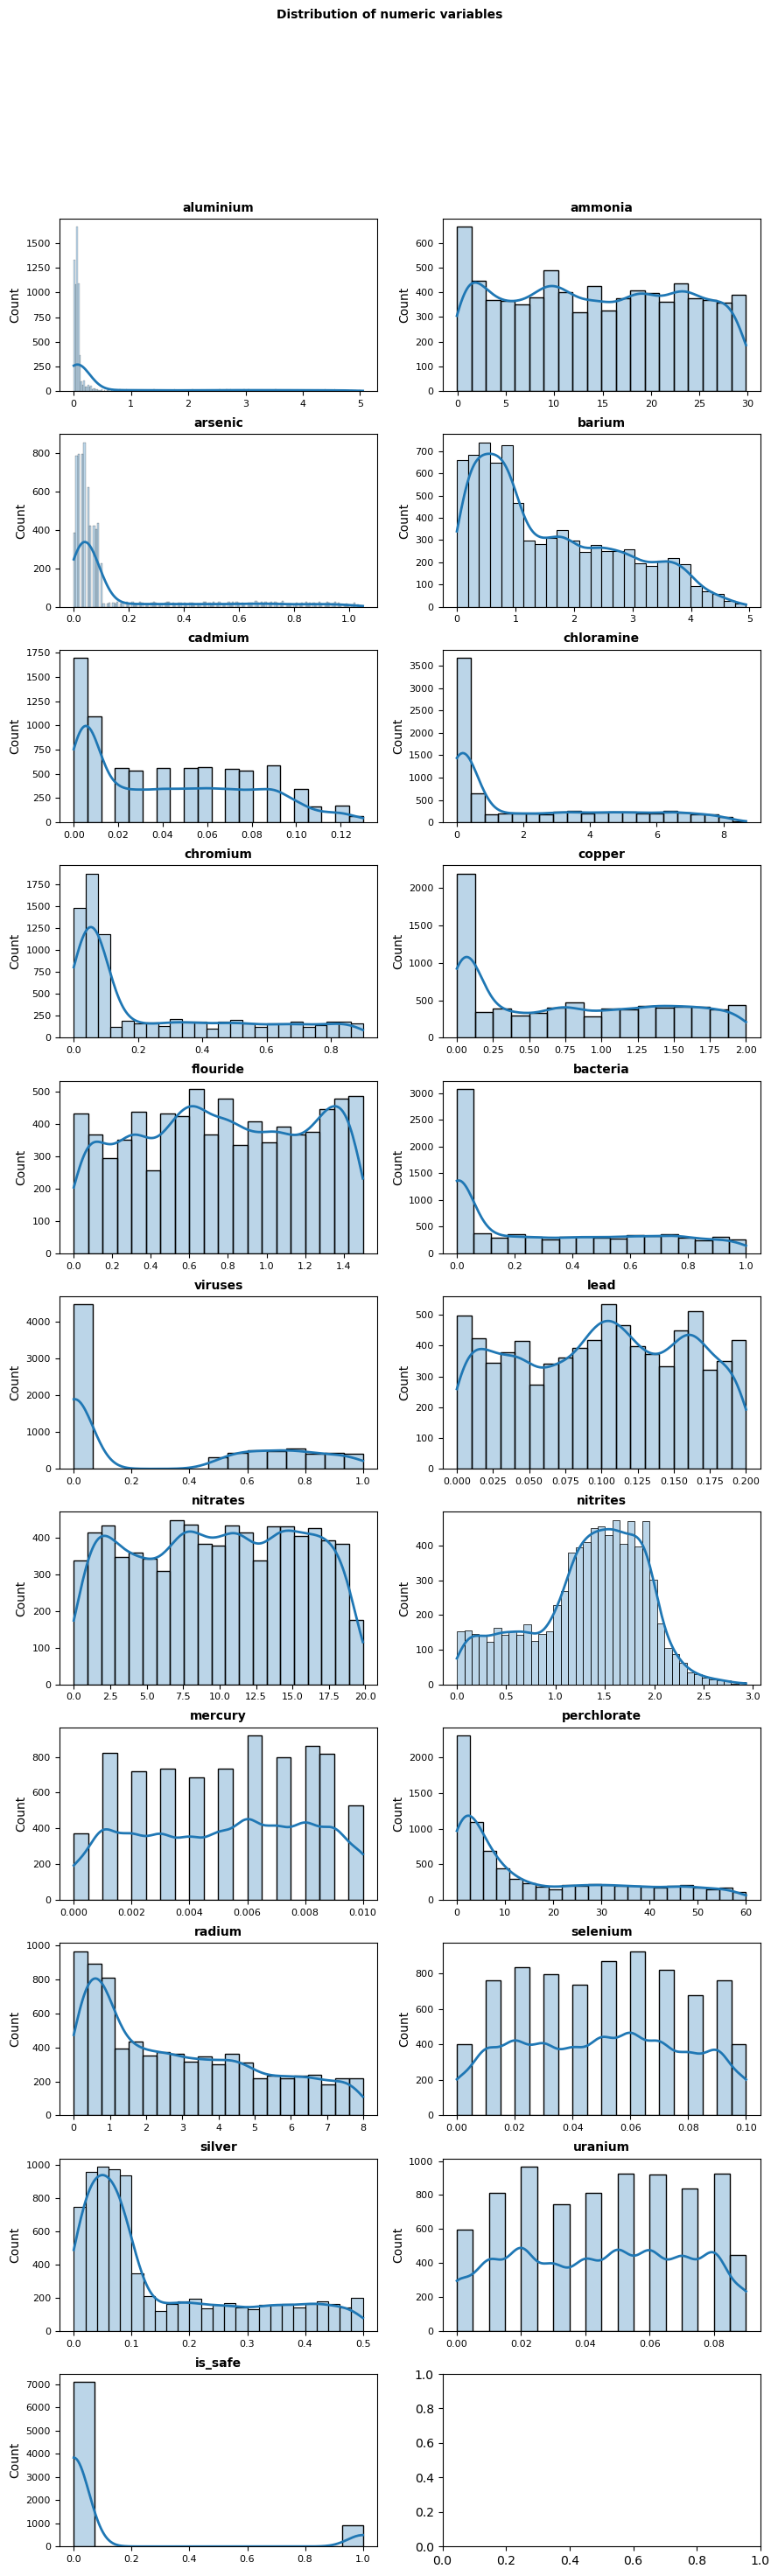

In [131]:
# Distribution of each variable
# ==============================================================================
# Fit number of subplots to the number of columns
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(9, 30))
axes = axes.flat
#col_numeric = admissions.select_dtypes(include=['float64', 'int']).columns # when only numeric coluns are selected

col_numeric = waterquality.columns

for i, colum in enumerate(col_numeric):
    sns.histplot(
        data    = waterquality,
        x       = colum,
        stat    = "count",
        kde     = True,
        #color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numeric variables', fontsize = 10, fontweight = "bold");

In [132]:
# Cheking NaN /null values
waterquality.isnull().sum()*100/waterquality.shape[0]

aluminium      0.0
ammonia        0.0
arsenic        0.0
barium         0.0
cadmium        0.0
chloramine     0.0
chromium       0.0
copper         0.0
flouride       0.0
bacteria       0.0
viruses        0.0
lead           0.0
nitrates       0.0
nitrites       0.0
mercury        0.0
perchlorate    0.0
radium         0.0
selenium       0.0
silver         0.0
uranium        0.0
is_safe        0.0
dtype: float64

In [133]:
waterquality.describe()  # Only numerical variables are presented
print(waterquality.columns)

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')


Ahora en las dummy cambiarles el nombre que queda feísimo

In [134]:
from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
X = waterquality.iloc[:, 0:19]
y = waterquality["is_safe"]


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.7,  # 70% for training
                                        random_state = 1234,
                                        shuffle      = True
                                        )

In [159]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Model creation
# ==============================================================================
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_train2 = sm.add_constant(X_train, prepend=True)
model = sm.Logit(endog=y_train, exog=X_train2,)
model = model.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.250225
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: is_safe          Pseudo R-squared: 0.300      
Date:               2023-10-04 17:46 AIC:              2841.0138  
No. Observations:   5597             BIC:              2973.6135  
Df Model:           19               Log-Likelihood:   -1400.5    
Df Residuals:       5577             LL-Null:          -2000.0    
Converged:          1.0000           LLR p-value:      1.5382e-242
No. Iterations:     8.0000           Scale:            1.0000     
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const             0.1687   0.2601  0.6484 0.5167  -0.3412   0.6785
aluminium         0.7132   0.0384 18.5683 0.0000   0.6380   0.7885
ammonia          -0.0224   0.0058 -3.8525 0.0001  -0.0338  -0.0110
arsenic          -3.1097   0.3716 -8.3679 0.0000  -3.8380  -2.3813
barium            0.1318   0.0473  2.7848 0.0054   0.0390   0.2246
cadmium         -19.8536   2.0837 -9.5281 0.0000 -23.9375 -15.7696
chloramine        0.1889   0.0243  7.7693 0.0000   0.1413   0.2366
chromium          1.1519   0.2131  5.4044 0.0000   0.7341   1.5696
copper           -0.3061   0.0838 -3.6541 0.0003  -0.4703  -0.1419
flouride          0.1230   0.1148  1.0714 0.2840  -0.1020   0.3480
bacteria          0.7627   0.2564  2.9745 0.0029   0.2601   1.2653
viruses          -1.3038   0.2199 -5.9285 0.0000  -1.7348  -0.8727
lead             -1.4550   0.8850 -1.6441 0.1002  -3.1896   0.2796
nitrates         -0.0423   0.0091 -4.6642 0.0000  -0.0601  -0.0245
nitrites         -0.3231   0.1152 -2.8041 0.0050  -0.5489  -0.0973
mercury         -52.6317  16.6924 -3.1530 0.0016 -85.3482 -19.9152
perchlorate      -0.0266   0.0037 -7.2205 0.0000  -0.0338  -0.0194
radium           -0.0480   0.0234 -2.0496 0.0404  -0.0938  -0.0021
selenium         -6.8061   1.7532 -3.8822 0.0001 -10.2422  -3.3700
silver           -1.6057   0.4147 -3.8719 0.0001  -2.4185  -0.7929
==================================================================

"""

In [136]:
# performing predictions on the training dataset
# ==============================================================================

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
predict_train = model.predict(exog = X_train)
clas_train = np.where(predict_train < 0.8, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 89.24423798463462%


In [137]:
confusion_matrix = pd.crosstab(
    y_train.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,4938,14
1,588,57


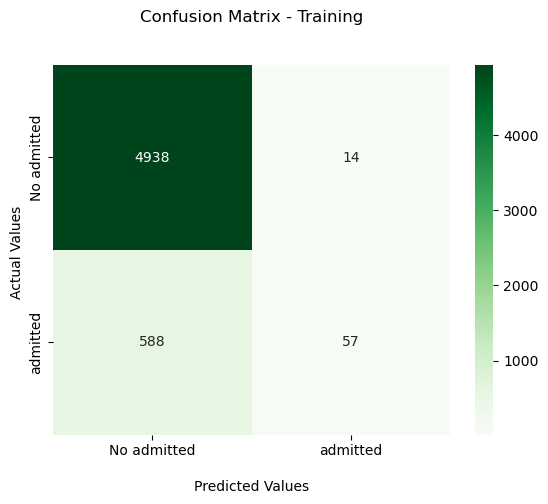

In [138]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Greens', fmt='g')

ax.set_title('Confusion Matrix - Training\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No admitted','admitted'])
ax.yaxis.set_ticklabels(['No admitted','admitted'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [160]:
data_new = X_train.iloc[:, [0,1,2,3,4,5,6,7,9,10,12,13,14,15,16,17,18,19]]

#X_train.describe
data_new.describe

<bound method NDFrame.describe of       const  aluminium  ammonia  arsenic  barium  cadmium  chloramine  \
2224    1.0       0.08    15.18    0.030    2.54    0.004        0.00   
2485    1.0       0.06    24.12    0.010    1.10    0.002        2.77   
1889    1.0       4.16    19.75    0.340    2.88    0.100        7.03   
6353    1.0       0.02     9.25    0.070    0.74    0.040        0.21   
2405    1.0       0.11     2.63    0.040    2.60    0.005        3.01   
...     ...        ...      ...      ...     ...      ...         ...   
3276    1.0       0.18     1.43    0.180    2.04    0.060        4.02   
7221    1.0       0.03     0.90    0.100    0.57    0.020        0.18   
1318    1.0       4.73    11.75    0.130    2.45    0.000        5.76   
723     1.0       3.50    24.25    0.010    2.10    0.006        5.69   
2863    1.0       0.36     1.01    0.001    2.35    0.005        1.77   

      chromium  flouride  bacteria   lead  nitrates  nitrites  mercury  \
2224      0.54 

In [161]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.Logit(endog=y_train, exog=data_new,)
model = model.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.254592
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: is_safe          Pseudo R-squared: 0.288      
Date:               2023-10-04 17:47 AIC:              2885.9006  
No. Observations:   5597             BIC:              3005.2404  
Df Model:           17               Log-Likelihood:   -1425.0    
Df Residuals:       5579             LL-Null:          -2000.0    
Converged:          1.0000           LLR p-value:      6.5793e-234
No. Iterations:     8.0000           Scale:            1.0000     
------------------------------------------------------------------
                 Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const            -0.1414   0.2549 -0.5546 0.5792  -0.6409   0.3582
aluminium         0.6735   0.0373 18.0368 0.0000   0.6003   0.7467
ammonia          -0.0250   0.0058 -4.3386 0.0000  -0.0362  -0.0137
arsenic          -3.1804   0.3721 -8.5464 0.0000  -3.9097  -2.4510
barium            0.1285   0.0470  2.7356 0.0062   0.0364   0.2206
cadmium         -20.5015   2.0784 -9.8641 0.0000 -24.5750 -16.4279
chloramine        0.1849   0.0240  7.6908 0.0000   0.1378   0.2320
chromium          1.1255   0.2108  5.3402 0.0000   0.7124   1.5386
flouride          0.1024   0.1137  0.9005 0.3679  -0.1205   0.3254
bacteria         -0.4185   0.1608 -2.6025 0.0093  -0.7337  -0.1033
lead             -1.9922   0.8787 -2.2673 0.0234  -3.7143  -0.2701
nitrates         -0.0408   0.0090 -4.5377 0.0000  -0.0584  -0.0232
nitrites         -0.1760   0.1105 -1.5924 0.1113  -0.3927   0.0406
mercury         -58.4857  16.5763 -3.5283 0.0004 -90.9746 -25.9968
perchlorate      -0.0260   0.0036 -7.1287 0.0000  -0.0332  -0.0189
radium           -0.0384   0.0232 -1.6538 0.0982  -0.0839   0.0071
selenium         -6.3376   1.7311 -3.6610 0.0003  -9.7306  -2.9447
silver           -1.5800   0.4114 -3.8404 0.0001  -2.3863  -0.7736
==================================================================

"""

In [141]:
# performing predictions on the training dataset
# ==============================================================================

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
columnas_a_eliminar = ["flouride", "lead"]
X_test = X_test.drop(columnas_a_eliminar, axis=1)
X_test = sm.add_constant(X_test, prepend=True)
predict_train = model.predict(exog = X_test)
clas_train = np.where(predict_train < 0.8, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 89.78741142142559%


In [142]:
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,2129,3
1,242,25


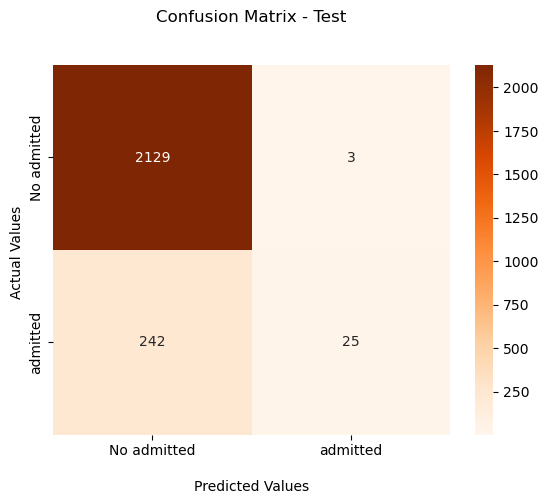

In [143]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Oranges', fmt='g')

ax.set_title('Confusion Matrix - Test\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No admitted','admitted'])
ax.yaxis.set_ticklabels(['No admitted','admitted'])

## Display the visualization of the Confusion Matrix.
plt.show()

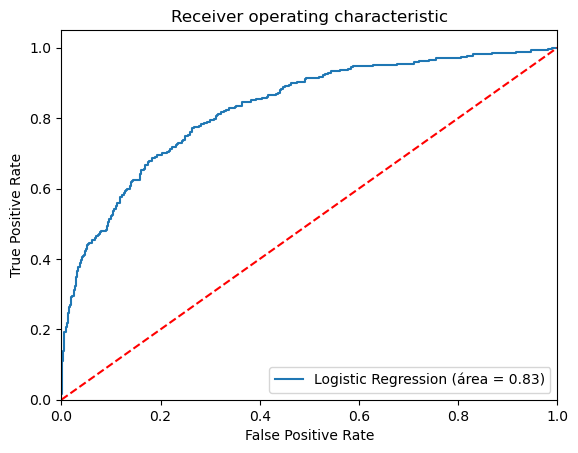

AUC: 0.828


In [144]:
#Libraries required for ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# ROC curve for the test dataset

logit_roc_auc = roc_auc_score(y_test, model.predict(exog = X_test)) # AUC estimatiion
fpr, tpr, thresholds = roc_curve(y_test, model.predict(exog = X_test))  #ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (área = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

...
# calculate AUC
auc = roc_auc_score(y_test, model.predict(exog = X_test))
print('AUC: %.3f' % auc)

In [145]:
pred_y = model.predict(X_test)
pred_y

5751    0.016282
5455    0.003267
7193    0.013480
2764    0.107826
417     0.654591
          ...   
2751    0.017166
832     0.189385
104     0.786559
2598    0.041665
6663    0.018888
Length: 2399, dtype: float64

In [146]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
#Fitting model with X and Y values of dataset
logit.fit(X_train.drop(columnas_a_eliminar, axis=1),y_train)

LogisticRegression()

In [147]:
pred_y = logit.predict_proba(X_test)
pred_y

array([[0.95909306, 0.04090694],
       [0.98393802, 0.01606198],
       [0.96485092, 0.03514908],
       ...,
       [0.17160406, 0.82839594],
       [0.93251579, 0.06748421],
       [0.93800937, 0.06199063]])

<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

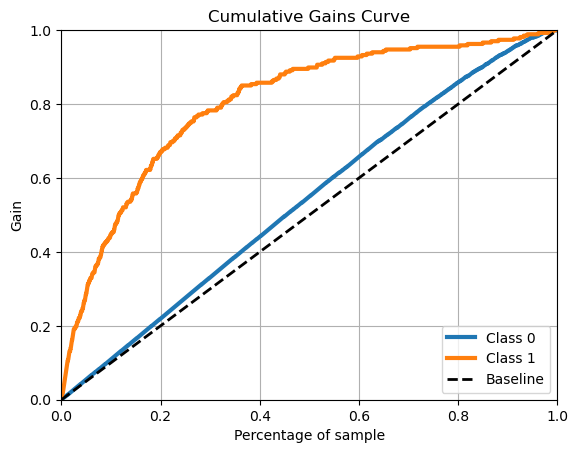

In [148]:
import scikitplot as skplt
#following line is used to find Gains Curve
skplt.metrics.plot_cumulative_gain(y_test,pred_y)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

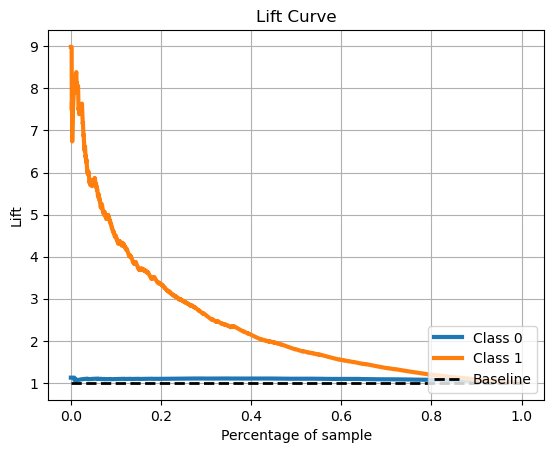

In [149]:
#Following line is used to find Lift curve
skplt.metrics.plot_lift_curve(y_test,pred_y)

In [153]:
X_test.columns

Index(['const', 'aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium',
       'chloramine', 'chromium', 'copper', 'bacteria', 'viruses', 'nitrates',
       'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver'],
      dtype='object')

In [155]:
y_pred_df = pd.DataFrame({'actual':y_test,'predicted_prob':model.predict(sm.add_constant(X[X_test.columns[1:]]))})
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)
y_pred_df

,actual,predicted_prob
0,NaN,0.144332
1,1.0,0.267865
2,0.0,0.074840
3,NaN,0.248604
4,NaN,0.389582
...,...,...
7991,NaN,0.062535
7992,NaN,0.094462
7993,NaN,0.138158
7994,NaN,0.554782


In [156]:
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)

In [157]:
sorted_predict_df 

,predicted_prob,actual
549,0.965723,NaN
102,0.956485,NaN
249,0.953977,1.0
921,0.950323,NaN
916,0.943754,NaN
...,...,...
3619,0.000078,NaN
3149,0.000071,0.0
3694,0.000063,NaN
3195,0.000059,NaN
